<a href="https://colab.research.google.com/github/Benashael/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessities**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Loading the Data**

In [ ]:
df = pd.read_csv("/content/IRIS.csv")

# **Exploratory Data Analysis (EDA)**

**Viewing Data**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Visualizing Data**

<Axes: title={'center': 'Sepal and Petal Measurements by Species'}, xlabel='species', ylabel='sepal_length'>

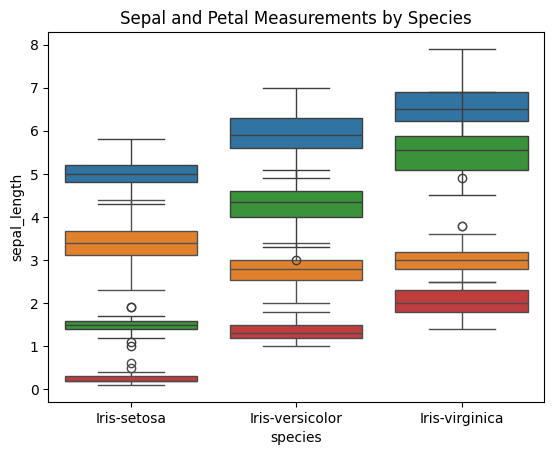

In [ ]:
plt.title('Sepal and Petal Measurements by Species')
sns.boxplot(data=df, x='species', y='sepal_length')
sns.boxplot(data=df, x='species', y='sepal_width')
sns.boxplot(data=df, x='species', y='petal_length')
sns.boxplot(data=df, x='species', y='petal_width')

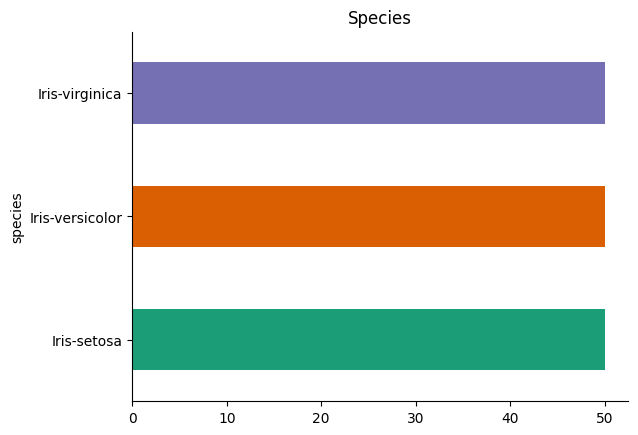

In [ ]:
plt.title('Species')
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Sepal vs Petal Dimensions'}, xlabel='sepal_length', ylabel='petal_length'>

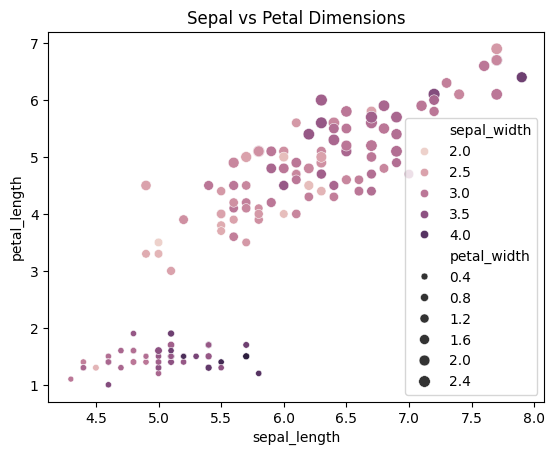

In [ ]:
plt.title('Sepal vs Petal Dimensions')
sns.scatterplot(x="sepal_length", y="petal_length", data=df, hue="sepal_width", size="petal_width")

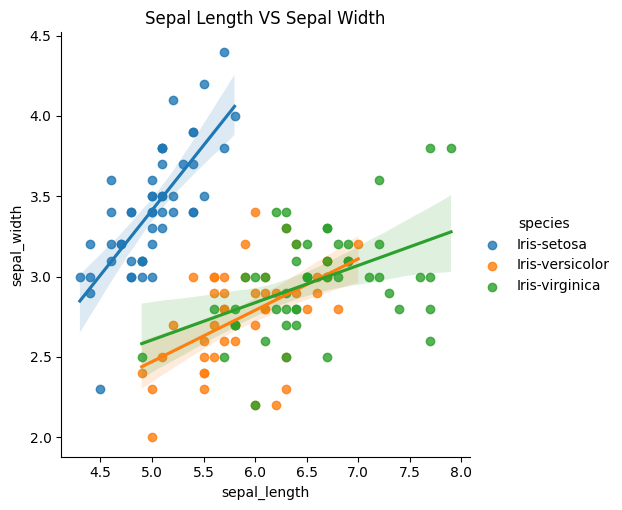

In [ ]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    data=df
)
plt.title("Sepal Length VS Sepal Width")
plt.show()

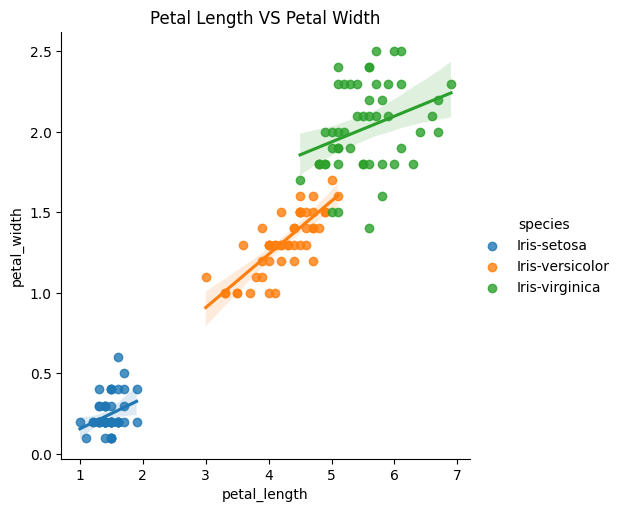

In [ ]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    data=df
)
plt.title("Petal Length VS Petal Width")
plt.show()

**Statistical Analysis**

In [ ]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# **Data Preprocessing**

**Encoding Categorical Features**

In [ ]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

**Splitting the Dataset into Features and Target**

In [ ]:
X = df.drop(columns='species')
y = df.species

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

**Splitting the Dataset into Training and Testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

**Logistic Regression**

In [ ]:
# Training
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluation
y_pred = LR.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**K - Nearest Neighbors**

In [ ]:
# Training
KNN=KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluation
y_pred = KNN.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Decision Tree**

In [ ]:
# Training
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluation
y_pred = DT.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Random Forest**

In [ ]:
# Training
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluation
y_pred = RF.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Model with Good Performance: Logistic Regression, K - Nearest Neighbors, Decision Tree & Random Forest**